# Problem Statement

#### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
#### The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

#### Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Data Description

###### 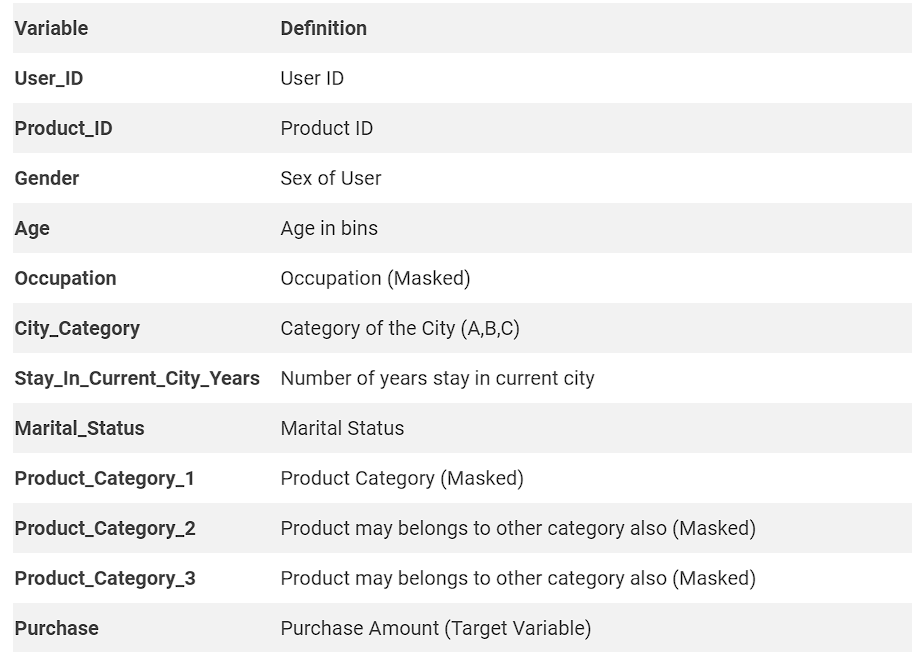

## importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings("ignore")

In [2]:
%cd "C:\Users\zaida\Downloads\Black Friday"

C:\Users\zaida\Downloads\Black Friday


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
print("Shape of training dataset = " ,np.shape(train))
print("Shape of testing dataset = " ,np.shape(test))

Shape of training dataset =  (550068, 12)
Shape of testing dataset =  (233599, 11)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Exploring the Features

In [10]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#### The first column are User_id  where every user ID  is unique so no need of this column


In [11]:
train.User_ID.unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

#### Product_ID is kind of important

In [12]:
train.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

#### There are two Genders

In [13]:
train.Gender.value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

#### There are 7 categories in age

In [14]:
train.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

#### Three City categories are there

In [15]:
train.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

# Missing Values

In [16]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### Product Category as the name suggests defines what kind of product it is. A product can just belong to one single category so Product Category -1 will be occupied while Product Category-2 and Product Category-3 will be Null. It can also happen that a product can belong to multiple categories, say a Smartphone, it can be categorized as an 'Electronic product' (Product Category -1) and may also be categorized as a 'Utility product' (Product Category -2).  These values are however masked and represented numerically since we do not actually need to know the values. Also if you select a specific Product Id and search for its multiple occurrences in the dataset, you will notice each of the rows will have the same values in Product Category-1,2,3.

#### Let's look at a scenario where there's a Customer Dataset, and in the contact details -
#### Many users will have only 1 mobile number. The next 2 fields shall be kept null.
#### However, if required, a single user-id can have more than one mobile numbers. That's where the next 2 fields come into picture.And, Mobile_Number_3 will only be used if Mobile_Number_2 field is already populated.


#### This are the categorical variables so i will use mode imputation

In [17]:
# Mode Imputation for Missing values
for i in train.columns:
    train[i] = train[i].fillna(train[i].mode()[0])

In [18]:
train.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# EDA

In [19]:
train.drop("User_ID",axis=1,inplace=True)

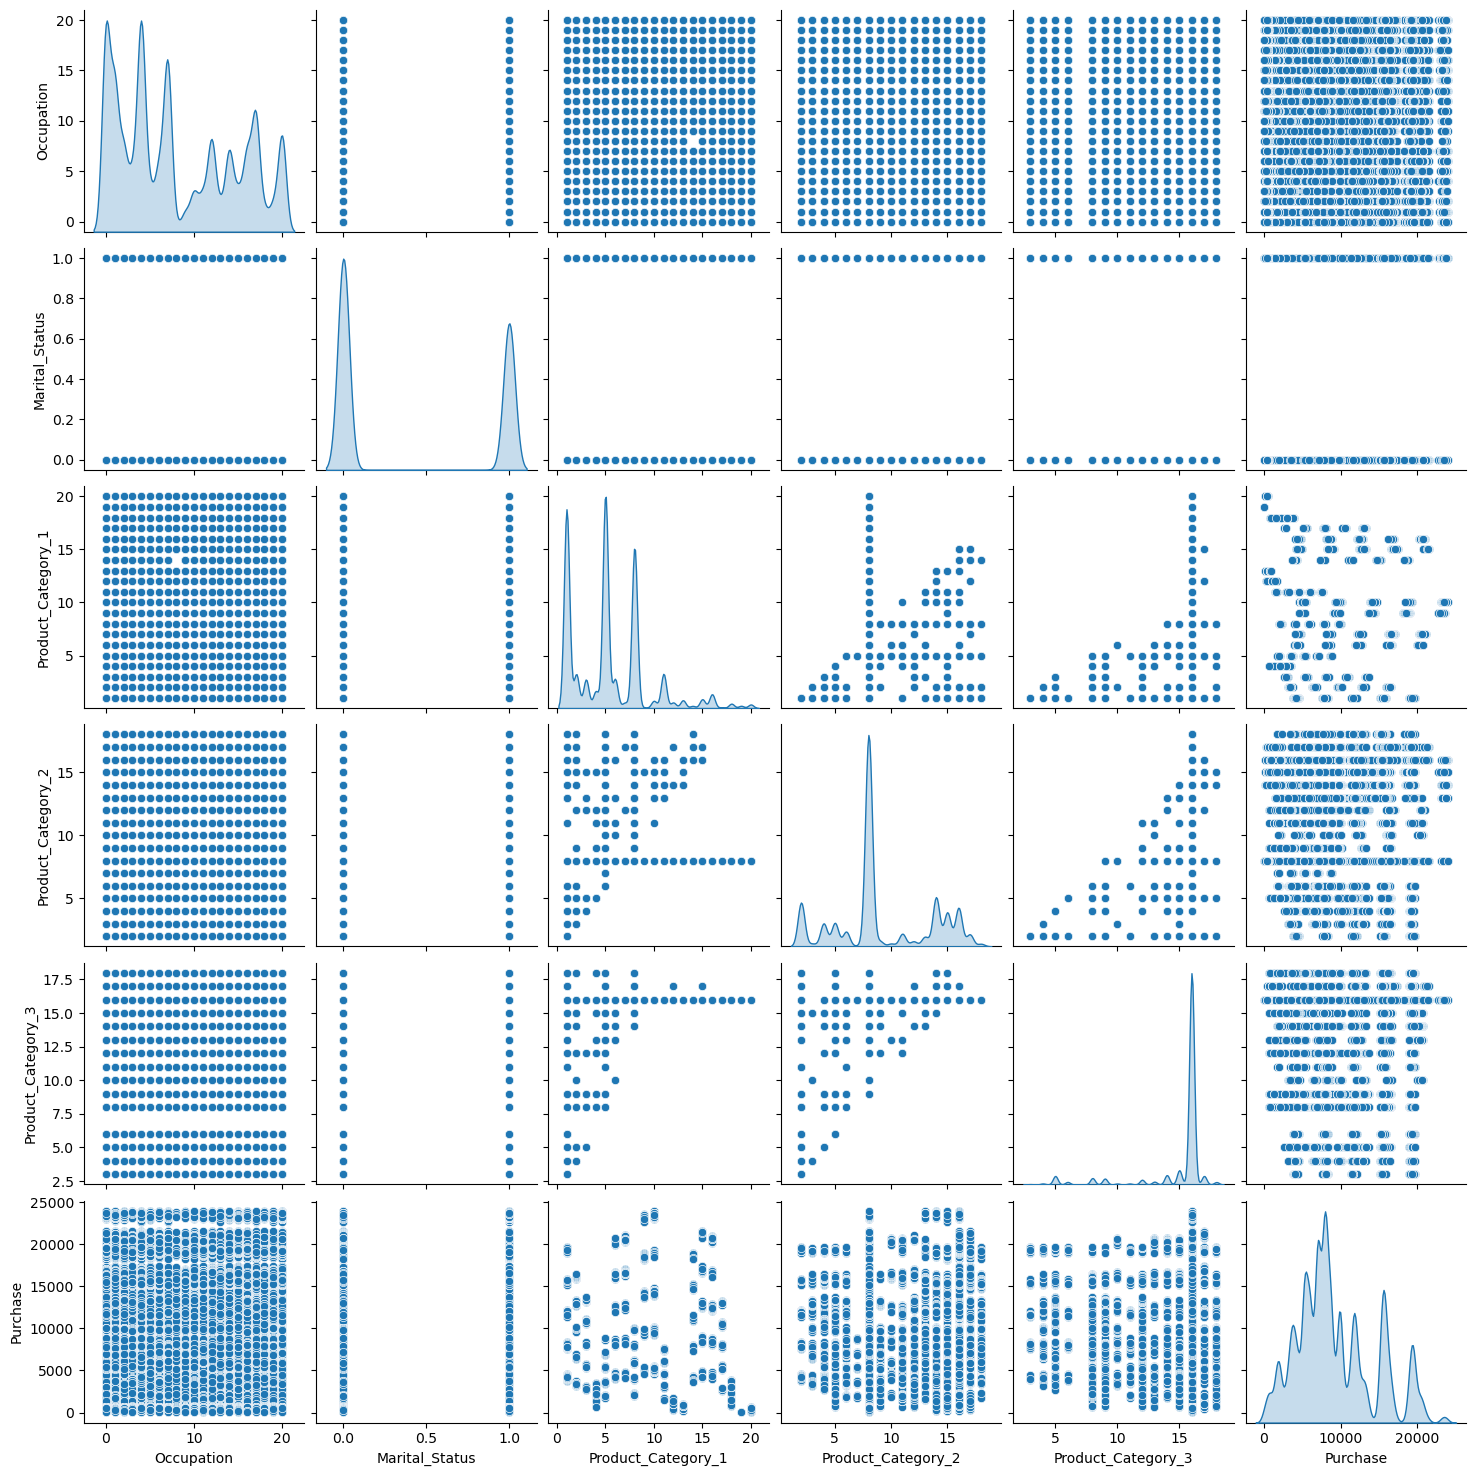

In [20]:
sns.pairplot(train,diag_kind="kde")

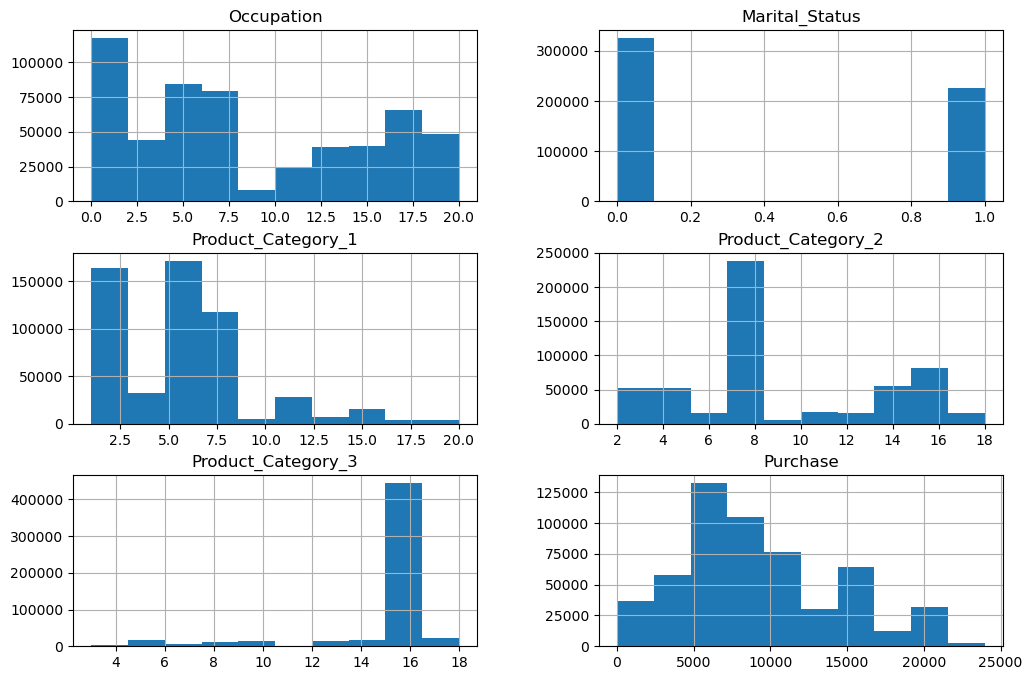

In [21]:
train.hist(figsize=(12,8))
plt.show()

In [22]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


<Axes: ylabel='count'>

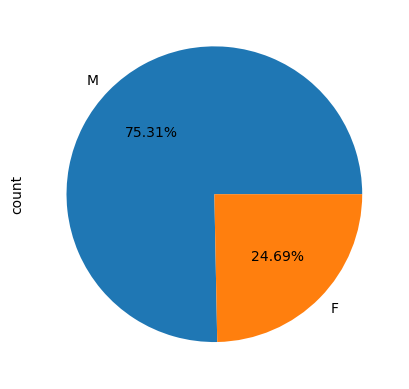

In [23]:
# Pie chart of Gender
train.Gender.value_counts().plot(kind="pie",autopct="%.2F%%")

<Axes: ylabel='count'>

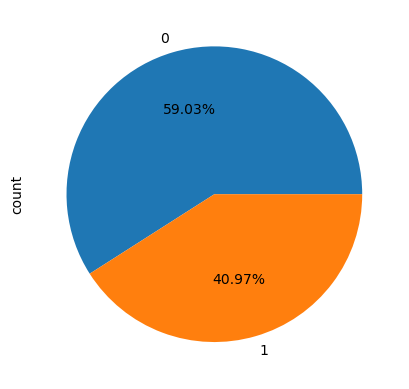

In [24]:
# Pie chart of Merital Status
train.Marital_Status.value_counts().plot(kind="pie",autopct="%.2F%%")
# 0=Not Married & 1=Married

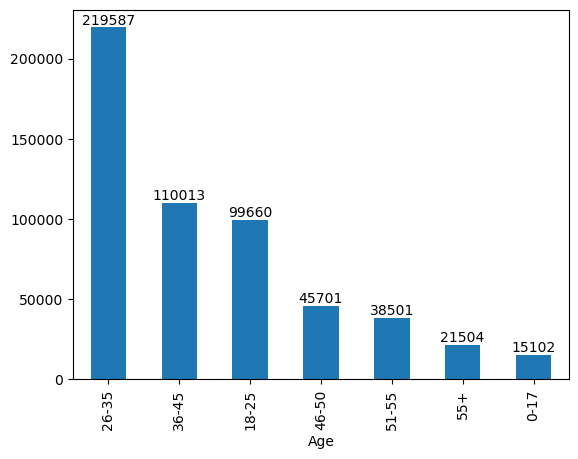

In [25]:
# Bar chart of Age
ax = train.Age.value_counts().plot(kind="bar")
for i in ax.containers:
        ax.bar_label(i)

#### Compairing to female male purchasing power is more here


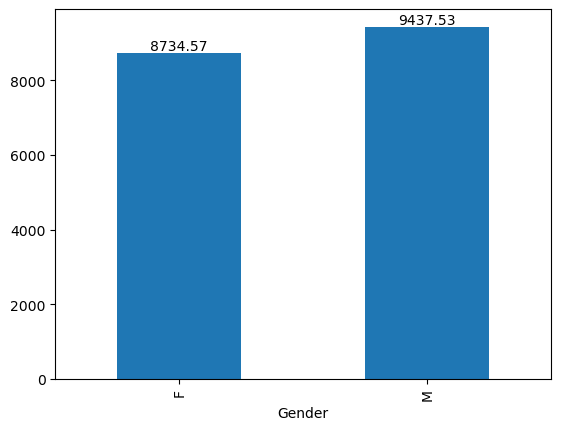

In [26]:
ax = train.Purchase.groupby(train.Gender).mean().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

#### There is a very little difference in purchasing power of different age group

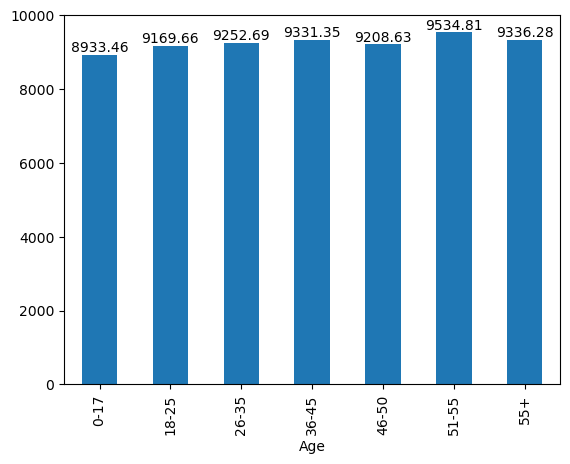

In [27]:
ax = train.Purchase.groupby(train.Age).mean().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

#### Purchacing power based on the CIty

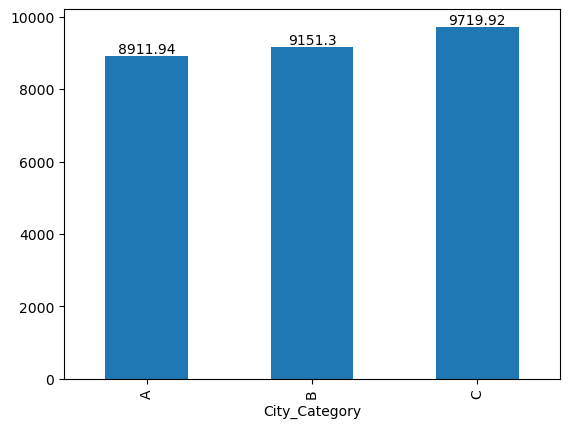

In [28]:
ax = train.Purchase.groupby(train.City_Category).mean().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

#### Merital Status Agains Purchase

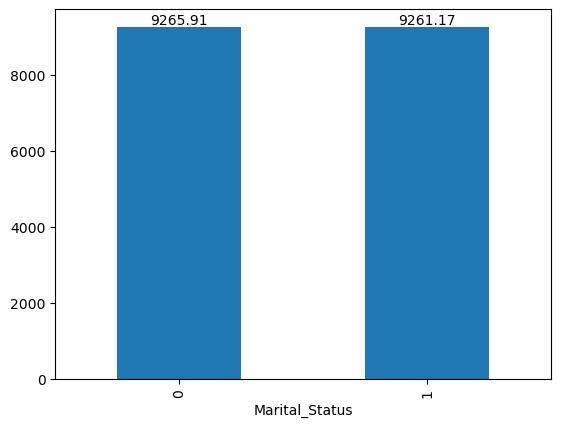

In [29]:
ax = train.Purchase.groupby(train.Marital_Status).mean().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

<Axes: >

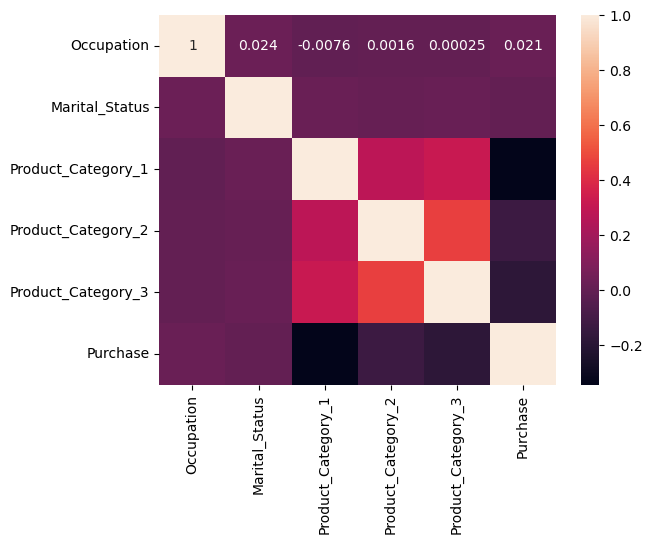

In [30]:
sns.heatmap(train[["Occupation","Marital_Status","Product_Category_1","Product_Category_2","Product_Category_3","Purchase"]].corr(),annot=True)

In [31]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


# Encoding

In [32]:
train['Product_ID'] = train['Product_ID'].astype(str)


In [33]:
# Remove P from product ID
train["Product_ID"] = train['Product_ID'].str[1:]

In [34]:
train["Product_ID"] = train.Product_ID.astype("int")

In [35]:
train["Product_Category_1"] = train["Product_Category_1"].astype(int)

In [36]:
train["Product_Category_2"] = train["Product_Category_2"].astype(int)

In [37]:
train["Product_Category_3"] = train["Product_Category_3"].astype(int)

In [38]:
# Changing + symbol
train.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [39]:
train.Stay_In_Current_City_Years = train.Stay_In_Current_City_Years.replace("4+","4")

In [40]:
train.Stay_In_Current_City_Years = train.Stay_In_Current_City_Years.astype(int)

In [183]:
train = pd.get_dummies(train,drop_first=True)

In [184]:
train

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,69042,10,2,0,3,8,16,8370,True,False,True,False,False,False,False,False,False,True,False,False
1,248942,10,2,0,1,6,14,15200,True,False,True,False,False,False,False,False,False,True,False,False
2,87842,10,2,0,12,8,16,1422,True,False,True,False,False,False,False,False,False,True,False,False
3,85442,10,2,0,12,14,16,1057,True,False,True,False,False,False,False,False,False,True,False,False
4,285442,16,4,0,8,8,16,7969,False,True,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,372445,13,1,1,20,8,16,368,False,True,False,False,False,False,False,True,False,False,True,False
550064,375436,1,3,0,20,8,16,371,True,False,False,False,True,False,False,False,False,False,False,True
550065,375436,15,4,1,20,8,16,137,True,False,False,False,True,False,False,False,False,False,True,False
550066,375436,1,2,0,20,8,16,365,True,False,False,False,False,False,False,False,True,False,False,True


<Axes: >

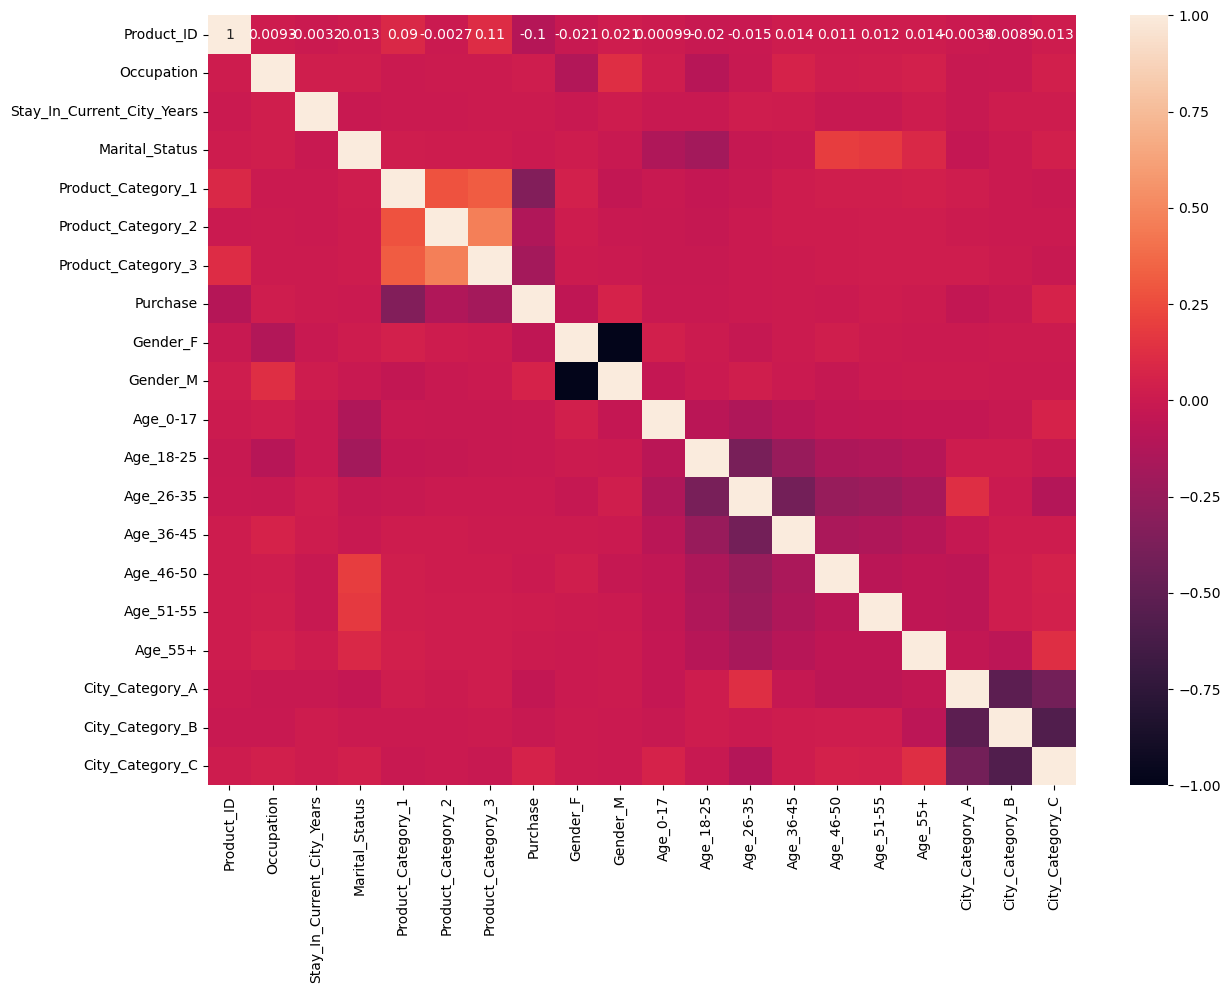

In [185]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),annot=True)

In [48]:
train.corr()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
Product_ID,1.000000,0.009344,-0.003162,0.013194,0.090193,-0.002729,0.110172,-0.103961,-0.021084,0.021084,0.000990,-0.019640,-0.014639,0.014153,0.011393,0.012339,0.013510,-0.003780,-0.008863,0.013068
Occupation,0.009344,1.000000,0.030005,0.024280,-0.007618,0.001566,0.000246,0.020833,-0.117291,0.117291,0.017627,-0.096659,-0.022461,0.058309,0.020323,0.030846,0.044096,-0.023070,-0.011673,0.034529
Stay_In_Current_City_Years,-0.003162,0.030005,1.000000,-0.012819,-0.004213,-0.000748,0.000016,0.005422,-0.014660,0.014660,-0.009817,-0.013693,0.022555,0.012759,-0.022851,-0.017661,0.007955,-0.023236,0.011008,0.010507
Marital_Status,0.013194,0.024280,-0.012819,1.000000,0.019888,0.010260,0.013978,-0.000463,0.011603,-0.011603,-0.139961,-0.189174,-0.027654,-0.013227,0.191389,0.172278,0.091778,-0.033088,-0.001863,0.033661
Product_Category_1,0.090193,-0.007618,-0.004213,0.019888,1.000000,0.279247,0.317944,-0.343703,0.045594,-0.045594,-0.013681,-0.035036,-0.018637,0.011429,0.025842,0.025784,0.033925,0.015702,-0.006076,-0.008554
Product_Category_2,-0.002729,0.001566,-0.000748,0.010260,0.279247,1.000000,0.463188,-0.128651,0.012445,-0.012445,-0.020906,-0.026345,-0.004193,0.009081,0.015145,0.017983,0.016593,0.004642,-0.003020,-0.001224
Product_Category_3,0.110172,0.000246,0.000016,0.013978,0.317944,0.463188,1.000000,-0.185945,0.006003,-0.006003,-0.020236,-0.021215,-0.003482,0.004998,0.012628,0.017114,0.017194,0.017039,0.004314,-0.020910
Purchase,-0.103961,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000,-0.060346,0.060346,-0.011055,-0.008831,-0.001830,0.006707,-0.003317,0.014792,0.002904,-0.042465,-0.019098,0.061012
Gender_F,-0.021084,-0.117291,-0.014660,0.011603,0.045594,0.012445,0.006003,-0.060346,1.000000,-1.000000,0.034945,0.000246,-0.029811,0.000088,0.029262,0.006416,-0.004921,-0.007299,0.006155,0.000426
Gender_M,0.021084,0.117291,0.014660,-0.011603,-0.045594,-0.012445,-0.006003,0.060346,-1.000000,1.000000,-0.034945,-0.000246,0.029811,-0.000088,-0.029262,-0.006416,0.004921,0.007299,-0.006155,-0.000426


# Data Splitting

In [49]:
X = train.drop("Purchase",axis=1)

In [50]:
y = train["Purchase"]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30)

In [53]:
print(Xtrain.shape)
print(Xtest.shape)

(385047, 19)
(165021, 19)


In [ ]:
print(ytrain.shape)
print(ytest.shape)

### Model Building

#### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(Xtrain,ytrain)
LR.score(Xtest,ytest)

0.13735086222078308

#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=15,n_jobs=-1).fit(Xtrain,ytrain)
RF.score(Xtest,ytest)

0.7054052495860905

#### knn

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
Knn = KNeighborsRegressor().fit(Xtrain,ytrain)

In [58]:
Knn.score(Xtest,ytest)

0.6668687852500398

#### XG Boost

In [59]:
from xgboost import XGBRegressor

In [67]:
XG = XGBRegressor(n_jobs=-1,n_estimators=1000)

In [68]:
XG.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
XG.score(Xtest,ytest)

0.7194307910673293

In [70]:
XG.score(Xtrain,ytrain)

0.7732871308629159

#### Evaluation Metrics

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [73]:
ypred = XG.predict(Xtest)

In [74]:
# Mean Squared Error
print("MSE",mean_squared_error(ytest,ypred))

MSE 7034625.219005872


In [75]:
# Mean Absolute Error
print("MAE",mean_absolute_error(ytest,ypred))

MAE 1962.5599968378729


In [76]:
# Root Mean Squared Error
print("RMSE",np.sqrt(mean_squared_error(ytest,ypred)))

RMSE 2652.2867904896466


In [77]:
print("R2",r2_score(ytest,ypred))

R2 0.7194307910673293


# Feature Selection

### Varience Threshold

In [134]:
from sklearn.feature_selection import VarianceThreshold

In [166]:
VT = VarianceThreshold(threshold=0.1)

In [167]:
VT.fit(Xtrain)

VarianceThreshold(threshold=0.1)

In [256]:
VT.get_feature_names_out()

array(['Product_ID', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Gender_F', 'Gender_M', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'City_Category_A', 'City_Category_B',
       'City_Category_C'], dtype=object)

In [168]:
VT.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
        True])

In [169]:
Constant_Columns = [i for i in Xtrain.columns if i not in Xtrain.columns[VT.get_support()]]
print(len(Constant_Columns))

4


In [170]:
for i in Constant_Columns:
    print(i)

Age_0-17
Age_46-50
Age_51-55
Age_55+


In [171]:
df = train.drop(Constant_Columns,axis=1)

In [172]:
df.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_18-25,Age_26-35,Age_36-45,City_Category_A,City_Category_B,City_Category_C
0,69042,10,2,0,3,8,16,8370,True,False,False,False,False,True,False,False
1,248942,10,2,0,1,6,14,15200,True,False,False,False,False,True,False,False
2,87842,10,2,0,12,8,16,1422,True,False,False,False,False,True,False,False
3,85442,10,2,0,12,14,16,1057,True,False,False,False,False,True,False,False
4,285442,16,4,0,8,8,16,7969,False,True,False,False,False,False,False,True


In [173]:
newX = df.drop("Purchase",axis=1)

In [174]:
newy = df["Purchase"]

In [175]:
newX.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_18-25,Age_26-35,Age_36-45,City_Category_A,City_Category_B,City_Category_C
0,69042,10,2,0,3,8,16,True,False,False,False,False,True,False,False
1,248942,10,2,0,1,6,14,True,False,False,False,False,True,False,False
2,87842,10,2,0,12,8,16,True,False,False,False,False,True,False,False
3,85442,10,2,0,12,14,16,True,False,False,False,False,True,False,False
4,285442,16,4,0,8,8,16,False,True,False,False,False,False,False,True


In [280]:
XG1 = XGBRegressor(n_jobs=-1,n_estimators=10000,max_depth=7)

In [281]:
XG1.fit(newX,newy)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [282]:
XG1.score(newX,newy)

0.8704177013584316

In [283]:
new_y_pred = XG1.predict(newX)

In [284]:
# Root Mean Squared Error
print("RMSE",np.sqrt(mean_squared_error(newy,new_y_pred)))

RMSE 1808.178400792726


## Best Model = XG Boost :-
## Accuraccy = 0.8704177013584316 & RMSE = 1808.178400792726

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [290]:
GR = GradientBoostingRegressor(max_depth=7,n_estimators=1000)

In [291]:
GR.fit(newX,newy)

GradientBoostingRegressor(max_depth=7, n_estimators=1000)

In [292]:
GR.score(newX,newy)

0.7637451001361228

In [293]:
gr_pred = GR.predict(newX)

In [294]:
# Root Mean Squared Error
print("RMSE",np.sqrt(mean_squared_error(newy,gr_pred)))

RMSE 2441.511923661071


### Mututal Information

In [206]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(Xtrain, ytrain)
mutual_info

array([3.80710081e-02, 1.84903722e-03, 4.19798450e-04, 0.00000000e+00,
       1.05046313e+00, 1.88195268e-01, 1.11353275e-01, 7.29880940e-03,
       6.51124659e-03, 7.57740287e-04, 2.25570997e-03, 1.01902110e-03,
       1.14497491e-03, 5.22833442e-04, 7.41966306e-04, 1.75167442e-03,
       8.86758898e-04, 0.00000000e+00, 6.22991970e-03])

In [207]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = Xtrain.columns
mutual_info.sort_values(ascending=False)

Product_Category_1            1.050463
Product_Category_2            0.188195
Product_Category_3            0.111353
Product_ID                    0.038071
Gender_F                      0.007299
Gender_M                      0.006511
City_Category_C               0.006230
Age_18-25                     0.002256
Occupation                    0.001849
Age_55+                       0.001752
Age_36-45                     0.001145
Age_26-35                     0.001019
City_Category_A               0.000887
Age_0-17                      0.000758
Age_51-55                     0.000742
Age_46-50                     0.000523
Stay_In_Current_City_Years    0.000420
Marital_Status                0.000000
City_Category_B               0.000000
dtype: float64

<Axes: >

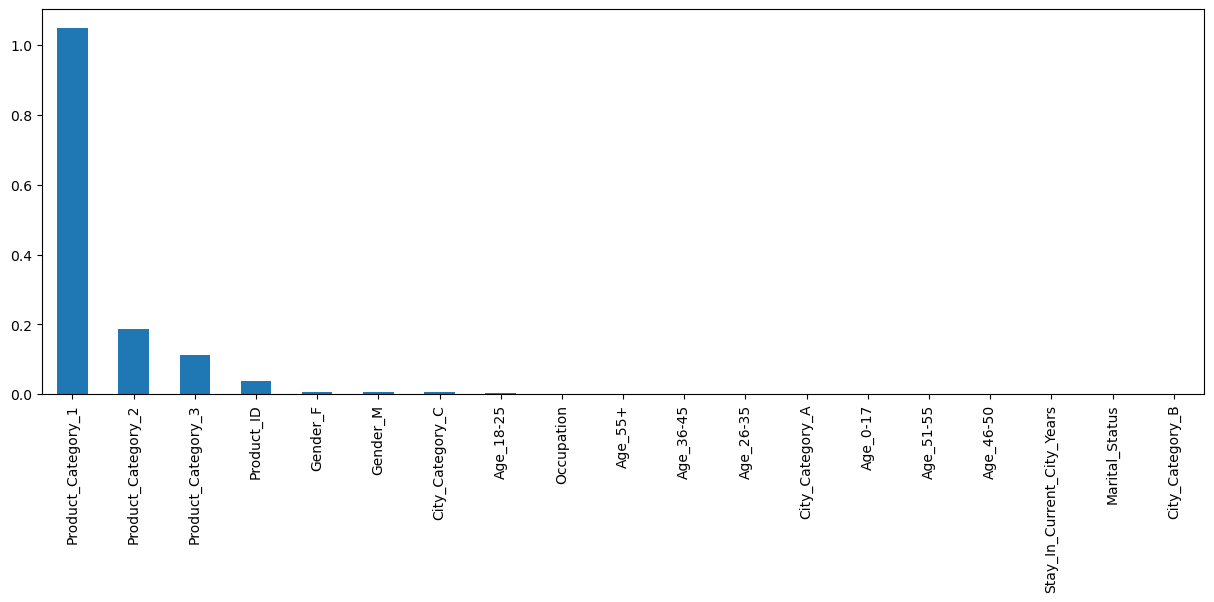

In [208]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [209]:
from sklearn.feature_selection import SelectPercentile

In [218]:
## Selecting the top 12 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(Xtrain, ytrain)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x0000021F0B004B80>)

In [219]:
selected_top_columns.get_support()

array([ True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True])

In [220]:
Xtrain.columns[selected_top_columns.get_support()]

Index(['Product_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Gender_F', 'Gender_M', 'Age_18-25',
       'City_Category_C'],
      dtype='object')

In [224]:
MItrain = train[['Product_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Gender_F', 'Gender_M', 'Age_18-25',
       'City_Category_C']]

In [226]:
MItrain.head()

,Product_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_18-25,City_Category_C
0,69042,10,3,8,16,True,False,False,False
1,248942,10,1,6,14,True,False,False,False
2,87842,10,12,8,16,True,False,False,False
3,85442,10,12,14,16,True,False,False,False
4,285442,16,8,8,16,False,True,False,True


In [269]:
XG2 = XGBRegressor(n_jobs=-1,n_estimators=10000)

In [270]:
XG2.fit(MItrain,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [271]:
XG2.score(MItrain,y)

0.7631590078327575

In [272]:
Mi_pred = XG2.predict(MItrain)

In [247]:
# Root Mean Squared Error
print("RMSE",np.sqrt(mean_squared_error(y,Mi_pred)))

RMSE 2444.538453448016


# Working on Testing data

In [78]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [79]:
test.drop("User_ID",axis=1,inplace=True)

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  233599 non-null  object 
 1   Gender                      233599 non-null  object 
 2   Age                         233599 non-null  object 
 3   Occupation                  233599 non-null  int64  
 4   City_Category               233599 non-null  object 
 5   Stay_In_Current_City_Years  233599 non-null  object 
 6   Marital_Status              233599 non-null  int64  
 7   Product_Category_1          233599 non-null  int64  
 8   Product_Category_2          161255 non-null  float64
 9   Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 17.8+ MB


In [81]:
test.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [82]:
# Mode Imputation for Missing values
for i in test.columns:
    test[i] = test[i].fillna(test[i].mode()[0])

In [83]:
test.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [84]:
test['Product_ID'] = test['Product_ID'].astype(str)

In [85]:
# Remove P from product ID
test["Product_ID"] = test['Product_ID'].str[1:]

In [86]:
test["Product_ID"] = test.Product_ID.astype("int")

In [87]:
test["Product_Category_1"] = test["Product_Category_1"].astype(int)

In [88]:
test["Product_Category_2"] = test["Product_Category_2"].astype(int)

In [89]:
test["Product_Category_3"] = test["Product_Category_3"].astype(int)

In [90]:
# Changing + symbol
test.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     82604
2     43589
3     40143
4+    35945
0     31318
Name: count, dtype: int64

In [91]:
test.Stay_In_Current_City_Years = test.Stay_In_Current_City_Years.replace("4+","4")

In [92]:
test.Stay_In_Current_City_Years = test.Stay_In_Current_City_Years.astype(int)

In [93]:
test = pd.get_dummies(test)

In [94]:
test

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,128942,7,2,1,1,11,16,False,True,False,False,False,False,True,False,False,False,True,False
1,113442,17,0,0,3,5,16,False,True,False,False,True,False,False,False,False,False,False,True
2,288442,1,4,1,5,14,16,True,False,False,False,False,True,False,False,False,False,True,False
3,145342,1,4,1,4,9,16,True,False,False,False,False,True,False,False,False,False,True,False
4,53842,1,1,0,4,5,12,True,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,118942,15,4,1,8,8,16,True,False,False,False,True,False,False,False,False,False,True,False
233595,254642,15,4,1,5,8,16,True,False,False,False,True,False,False,False,False,False,True,False
233596,31842,15,4,1,1,5,12,True,False,False,False,True,False,False,False,False,False,True,False
233597,124742,1,4,0,10,16,16,True,False,False,False,False,False,True,False,False,False,False,True


In [196]:
newtest = test.drop(["Age_0-17","Age_46-50","Age_51-55","Age_55+"],axis=1)

#### Downloading

In [285]:
xgtest=XG1.predict(newtest)

In [286]:
pd.DataFrame(xgtest).to_csv('Xtream_Boost.csv')

In [202]:
rftest=RF.predict(test)

In [203]:
pd.DataFrame(rftest).to_csv('RandomForest.csv')

In [254]:
test.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,128942,7,2,1,1,11,16,False,True,False,False,False,False,True,False,False,False,True,False
1,113442,17,0,0,3,5,16,False,True,False,False,True,False,False,False,False,False,False,True
2,288442,1,4,1,5,14,16,True,False,False,False,False,True,False,False,False,False,True,False
3,145342,1,4,1,4,9,16,True,False,False,False,False,True,False,False,False,False,True,False
4,53842,1,1,0,4,5,12,True,False,False,False,True,False,False,False,False,False,False,True


In [250]:
Mitest = test[['Product_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Gender_F', 'Gender_M', 'Age_18-25',
       'City_Category_C']]

In [252]:
xgtest=XG2.predict(Mitest)

In [253]:
pd.DataFrame(xgtest).to_csv('XGBoost.csv')